
# Test that binomial and Poisson distributions look increasingly more similar to Gaussians as the mean of the distribution increases.

## Your notebook should show the distributions, the models, clearly state the H0 null hypothesis, and properly interpret the tests (remember captions, significance, etc etc)

In [1]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# My Distributions

In [78]:
alpha = 0.05
np.random.seed(999)

#Normal Distribution
norm = np.random.randn(1000) 

#Normalized Poisson Distribution
lam = 20
pois = (np.random.poisson(lam, 1000) - lam) * (1/np.sqrt(lam))

#Normalized Binomial Distribution
n = 10 
p = 0.5
binom = (np.random.binomial(n, p, 1000) - n*p) / np.sqrt(n*p*(1-p))

#Array of means for looping
mean_array = np.arange(10, 2000, 10) 

# Testing the Poisson Distribution 

## $H_0$: The sample distribution comes from a Gaussian distribution
### $\alpha$ = 0.05

## Plotting and running the tests

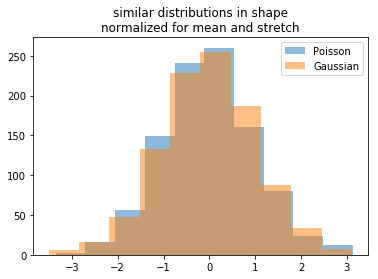

Poisson on Normal

KS Test: KstestResult(statistic=0.052468363120939276, pvalue=0.0078294399170928397)

AD Test: AndersonResult(statistic=2.3670726571554042, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

KL Test: 0.00491776967451

Pearson's Chi-Squared:


(None, Power_divergenceResult(statistic=-1861.7836790667943, pvalue=1.0))

In [110]:
#Plot the Poisson & Normal distributions
pl.hist(pois, alpha=0.5, label="Poisson")
pl.hist(norm, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions in shape\nnormalized for mean and stretch")
pl.show()

#Run the KS test for Poisson
print ("Poisson on Normal\n")
print ("KS Test:", scipy.stats.kstest(pois,'norm'))

#Run the AD test for Poisson
print ("\nAD Test:", scipy.stats.anderson(pois, dist='norm'))

#Prepping and running the KL test for Poisson
pdfPois, poisBins, = np.histogram(pois, density=True)
poisBinCent = poisBins[:-1] + 0.5*(poisBins[1] - poisBins[0])

print ("\nKL Test:", scipy.stats.entropy(pdfPois, scipy.stats.norm.pdf(poisBinCent)))

#Running the Chi-Square test for Poisson
print ("\nPearson's Chi-Squared:"), scipy.stats.chisquare(pois, norm)

## Interpreting the Results

#### KS Test - Because the p-value (0.007) is below our chosen value (0.05), we can reject $H_0$ and assert that our sample distribution is not Gaussian

#### AD Test - Because out AD statistic (2.36) is larger than the critical value at 0.05 (0.784), we can reject $H_0$ and assert that our sample distribution is not Gaussian

#### KL Test - Because out KL statistic (0.0049) is WHAT? 


we can reject $H_0$ and assert that our sample distribution is not Gaussian

#### Chi-Square Test - Because of  HOW DO WE INTERPRET CHI-SQUARE RESULTS?

---

# Testing the Binomial Distribution

## $H_0$: The sample distribution comes from a Gaussian distribution
### $\alpha$ = 0.05

## Plotting and running the tests

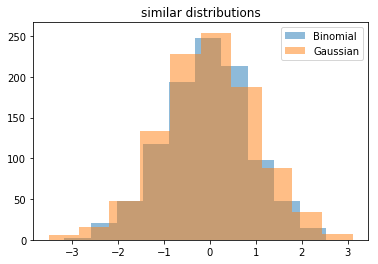

Binomial on Normal

KS Test: KstestResult(statistic=0.127, pvalue=1.6209256159527285e-14)

AD Test: AndersonResult(statistic=15.204460551392458, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

KL Test: 0.00641114132785

Pearson's Chi-Squared - 


(None,
 Power_divergenceResult(statistic=3416.8197399489045, pvalue=4.0325568531430412e-261))

In [112]:
#Plot the Binomial & Normal distributions
pl.figure()
pl.hist(binom, alpha=0.5, label="Binomial")
pl.hist(norm, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

#Run the KS test for Binomial
print ("Binomial on Normal\n")
print ("KS Test:", scipy.stats.kstest(binom,'norm'))

#Run the AD test for Binomial
print ("\nAD Test:", scipy.stats.anderson(binom,'norm'))

#Prepping and running the KL test for Binomial
pdfBinom, binomBins, = np.histogram(binom, density=True)
binomBinCent = binomBins[:-1] + 0.5*(binomBins[1] - binomBins[0])

print ("\nKL Test:", scipy.stats.entropy(pdfBinom, scipy.stats.norm.pdf(binomBinCent)))

#Running the Chi-Square test for Poisson
print ("\nPearson's Chi-Squared - "), scipy.stats.chisquare(binom, norm)

## Interpreting the Results

#### KS Test - Because the p-value is extremely smaller than our chosen value (0.05), we can reject $H_0$ and assert that our sample distribution is not Gaussian

#### AD Test - Because out AD statistic (15.2) is larger than the critical value at 0.05 (0.784), we can reject $H_0$ and assert that our sample distribution is not Gaussian

#### KL Test - Because out KL statistic (0.0064) is WHAT? 


we can reject $H_0$ and assert that our sample distribution is not Gaussian

#### Chi-Square Test - Because of  HOW DO WE INTERPRET CHI-SQUARE RESULTS?

---

# Looping for Increased Means

## Binomial

In [84]:
np.random.seed(999)

binom_KS_p_values = []
binom_AD_p_values = []

for n in mean_array:
    p = 0.5
    dist = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1-p))
    KS_p_value = scipy.stats.kstest(dist,'norm')[1]
    binom_KS_p_values.append(KS_p_value)
    AD_p_value = scipy.stats.anderson(dist,'norm')[1]
    binom_AD_p_values.append(AD_p_value)
    #ks_s_b[n] = scipy.stats.kstest(dist,'norm')
    #print (scipy.stats.kstest(dist,'norm'))
    #print (scipy.stats.anderson(dist, dist='norm'))
    #ad_b[n] = scipy.stats.anderson(dist, dist='norm')[0]
    #ad_b[n] = ad_b[n] / ad_b[0]
    #print ad_b[n]
  
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    #mybins = np.linspace(min(dist), max(dist), 10) 
    #bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... 
    # just so you know.
    #if i%10 == 0: 
    #    pl.hist(dist, bins=mybins)
    #    pl.plot(bincenters, scipy.stats.norm.pdf(bincenters)*1000)
    #kl_b [n] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], 
    #                                scipy.stats.norm.pdf(bincenters) + n)

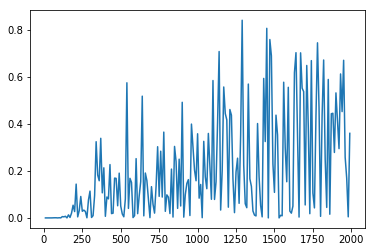

In [89]:
#Plotting

#KS Test
fig = pl.figure(figsize = (15,5))
fig.add_subplot(221)
pl.plot(narray, ks_s_b, label='KS statistics')
pl.plot(narray, ks_p_b, label='KS p-value')
pl.legend()

#AD Test
fig.add_subplot(222)
pl.plot(narray, ad_b,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

#KL Test
fig.add_subplot(223)
pl.plot(narray, kl_b, label='K-L (entropy)')

#Chi-Square Test
fig.add_subplot(224)
pl.plot(narray, kl_b, label='K-L (entropy)')

pl.legend();

---

---


## Poisson

In [ ]:
np.random.seed(999)
narray = []
for i,n in enumerate(narray):
    lam = i 
    dist = (np.random.poisson(lam, 1000) - lam) * (1/np.sqrt(lam))
    ks_stat_pois[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_pval_pois[i] = scipy.stats.kstest(dist,'norm')[1]
    #ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    #ad_b2[i] = ad_b[i] / ad_b[0]
    #print ad_b2[i]
  
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... 
    # just so you know.
    #if i%10 == 0: 
    #    pl.hist(dist, bins=mybins)
    #    pl.plot(bincenters, scipy.stats.norm.pdf(bincenters)*1000)
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], 
                                    scipy.stats.norm.pdf(bincenters) + n)

In [ ]:
#Plotting the Poisson

#KS Test
fig = pl.figure(figsize = (15,5))
fig.add_subplot(221)
pl.plot(narray, ks_s_b, label='KS statistics')
pl.plot(narray, ks_p_b, label='KS p-value')
pl.legend()

#AD Test
fig.add_subplot(222)
pl.plot(narray, ad_b,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

#KL Test
fig.add_subplot(223)
pl.plot(narray, kl_b, label='K-L (entropy)')

#Chi-Square Test
fig.add_subplot(224)
pl.plot(narray, kl_b, label='K-L (entropy)')

pl.legend();